# Homework 4

## Problem 1: PCA

### 1.1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from numpy.linalg import svd
import pandas as pd

In [2]:
samples=20
mean1=[0,0,0]
cov1=[[0.5,0,0],[0,0.5,0],[0,0,0.7]]
label1=np.random.multivariate_normal(mean1, cov1,samples)

In [3]:
mean2=[1,1,1]
cov2=[[0.5,0,0],[0,0.5,0],[0,0,0.01]]
label2=np.random.multivariate_normal(mean2, cov2,samples)

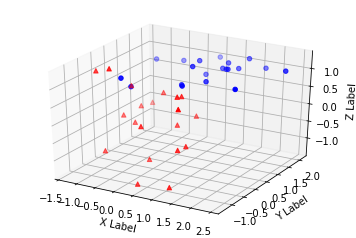

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x1,y1,z1=label1.T
ax.scatter(x1, y1, z1, c="r",marker="^")

x2,y2,z2=label2.T
ax.scatter(x2, y2, z2, c="b",marker="o")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### 1.2 


The label 2 points are labled in blue above. These points are are more compact and closer together. The label 1 points are more spread out and they go much lower in the $z$ direction than the label 1 points.It is also generally lower in value in the $x$ direction than the label 1 points. 

### 1.3

In [5]:
label3 = np.concatenate((label1, label2), axis = 0)
x,y,z=label3.T

In [6]:
#calculate mean
mean_x = np.sum(x) / 40
mean_y = np.sum(y) / 40
mean_z = np.sum(z) / 40

In [7]:
mean=[mean_x,mean_y,mean_z]
mean

[0.38162188117703855, 0.5274294102376105, 0.4483257530824714]

In [8]:
#calculate variance and covariance
var_x = np.sum((x - mean_x)**2) / 39
var_y = np.sum((y - mean_y)**2) / 39
var_z = np.sum((z - mean_z)**2) / 39


In [9]:
cov_xy=np.sum((x - mean_x)*(y - mean_y))/ 39
cov_xz=np.sum((x - mean_x)*(z - mean_z))/ 39
cov_zy=np.sum((z - mean_z)*(y - mean_y))/ 39

In [10]:
cov_matrix = np.array([[var_x, cov_xy,cov_xz], [cov_xy, var_y,cov_zy],[cov_xz,cov_zy,var_z]])

In [11]:
cov_matrix

array([[0.79748224, 0.20607808, 0.1185733 ],
       [0.20607808, 0.89028057, 0.42403712],
       [0.1185733 , 0.42403712, 0.57749207]])

In [12]:
np.cov(label3.T)

array([[0.79748224, 0.20607808, 0.1185733 ],
       [0.20607808, 0.89028057, 0.42403712],
       [0.1185733 , 0.42403712, 0.57749207]])

### 1.4 

In [13]:
from numpy.linalg import eig

In [14]:
w, v = eig(cov_matrix)

In [15]:
w

array([1.29802609, 0.68623173, 0.28099706])

In [16]:
v

array([[ 0.42801435,  0.9026409 ,  0.04520096],
       [ 0.74635319, -0.3248162 , -0.58090562],
       [ 0.50966717, -0.28237182,  0.81271491]])

In [17]:
v[:,0:2]

array([[ 0.42801435,  0.9026409 ],
       [ 0.74635319, -0.3248162 ],
       [ 0.50966717, -0.28237182]])

In [18]:
final=np.dot(label3,v[:,0:2])

In [19]:
final.shape

(40, 2)

In [20]:
x,y=final.T

Text(0,0.5,'Y')

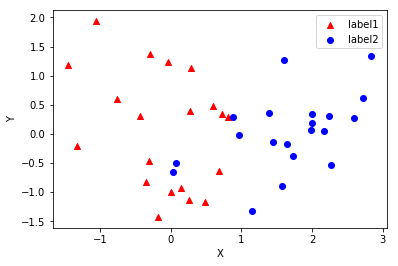

In [21]:
plt1=plt.scatter(x[0:20], y[0:20], c="r",marker="^")
plt2=plt.scatter(x[20:40], y[20:40], c="b",marker="o")
plt.legend([plt1,plt2],["label1","label2"])
plt.xlabel('X')
plt.ylabel('Y')


Did PCA make it easier to distingush the two labels in two dimensions?

Yes. The labels are clearly separated.

# Problem 2: Low rank approximation of Mona Lisa.

### 2.1

In [22]:
from PIL import Image

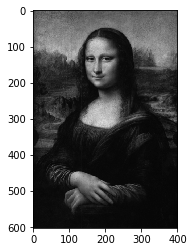

In [23]:
img = Image.open('mona_lisa.png')
imggray = img.convert('LA')
plt.imshow(imggray);

In [24]:
bits=img.size*2*8
bits

(400,
 603,
 400,
 603,
 400,
 603,
 400,
 603,
 400,
 603,
 400,
 603,
 400,
 603,
 400,
 603,
 400,
 603,
 400,
 603,
 400,
 603,
 400,
 603,
 400,
 603,
 400,
 603,
 400,
 603,
 400,
 603)

In [25]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
imgmat

matrix([[22., 68., 68., ..., 74., 77., 78.],
        [22., 63., 62., ..., 79., 77., 83.],
        [21., 63., 65., ..., 81., 76., 79.],
        ...,
        [12., 10., 10., ...,  6.,  7.,  7.],
        [13., 11., 11., ...,  6.,  5.,  6.],
        [13., 11., 10., ...,  6.,  6.,  6.]])

In [26]:
def low_rank_approximation(D, k):
    U,s,V = svd(D,full_matrices=False)
    s1= np.diag(s[:k+1])
    return np.dot(U[:,:k+1],np.dot(s1,V[:k+1,:]))

In [27]:
imgmat.shape

(603, 400)

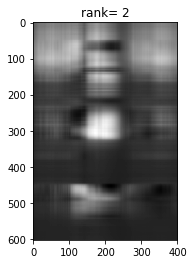

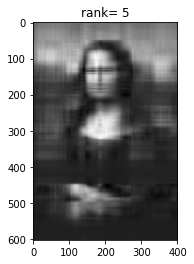

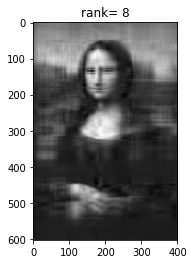

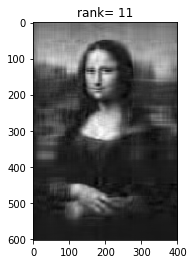

In [28]:
for i in range(2,12,3):
    p=low_rank_approximation(imgmat,i)
    plt.imshow(p,cmap='gray')
    title="rank= %s"%i
    plt.title(title)
    plt.show()

### 2.2

In [50]:
def compression(img,k):
    original_shape = img.shape
    p= low_rank_approximation(img,k)
    fig,axes = plt.subplots(1,2,figsize=(8,5))
    axes[0].imshow(img, cmap='gray')
    #calculation the conpression ratio and the bits
    bits=(k*(original_shape[0] + original_shape[1]+1))*2*8
    axes[1].set_title("bits={:.0f}".format(bits))
    axes[1].imshow(p,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

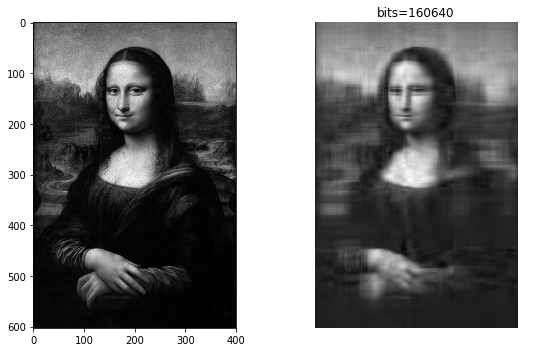

In [53]:
compression(imgmat,10)

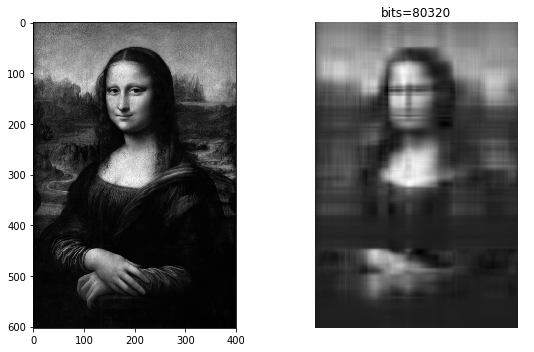

In [54]:
compression(imgmat,5)

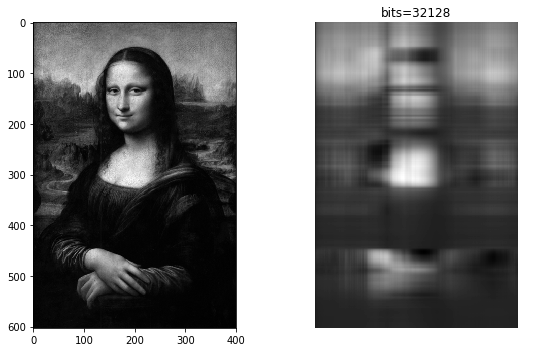

In [55]:
compression(imgmat,2)

# Problem 3: Using Low Rank Structure for Corrupted Entries.

In [31]:
mat1 = np.genfromtxt ("CorrMat1.csv", delimiter=",")
mat2 = np.genfromtxt ("CorrMat3.csv", delimiter=",")

In [32]:
mat1

array([[3.481e+03, 2.419e+03, 5.074e+03, ..., 3.540e+02, 2.124e+03,
        1.180e+02],
       [2.419e+03, 1.681e+03, 3.526e+03, ..., 2.460e+02, 1.476e+03,
        8.200e+01],
       [5.074e+03, 3.526e+03, 7.396e+03, ..., 5.160e+02, 3.096e+03,
        1.720e+02],
       ...,
       [3.540e+02, 2.460e+02, 5.160e+02, ..., 3.600e+01, 2.160e+02,
        1.200e+01],
       [2.124e+03, 1.476e+03, 3.096e+03, ..., 2.160e+02, 1.296e+03,
        7.200e+01],
       [1.180e+02, 8.200e+01, 1.720e+02, ..., 1.200e+01, 7.200e+01,
        4.000e+00]])

In [33]:
mat2

array([[11961., 13479.,  9106., ...,  5626.,  9200.,  5082.],
       [13479., 16106.,  8784., ...,  7134., 10700.,  6553.],
       [ 9106.,  8784.,  9324., ...,  2840.,  6534.,  2582.],
       ...,
       [ 5626.,  7134.,  2840., ...,  6376.,  3382.,  2264.],
       [ 9200., 10700.,  6534., ...,  3382.,  7697.,  4550.],
       [ 5082.,  6553.,  2582., ...,  2264.,  4550.,  3137.]])

In [34]:
def low_rank_structure(m):
    U,s,V = svd(m)
    index = np.argwhere(s > 1)
    k=int(index[-1])
    s1= np.diag(s[:k+1])
    return np.dot(U[:,:k+1],np.dot(s1,V[:k+1,:]))


In [35]:
def low_rank(m,k):
    U,s,V = svd(m)
    s[s<k]=0
    return np.dot(U,np.dot(np.diag(s),V))

Those two functions are equal.

In [36]:
diff=mat1-low_rank(mat1,1)

In [37]:
diff

array([[-6.82121026e-12,  1.77351467e-11,  2.54658516e-11, ...,
         1.64845915e-12,  1.09139364e-11,  5.68434189e-13],
       [-3.18323146e-12,  2.00088834e-11,  8.18545232e-12, ...,
         4.26325641e-13,  2.72848411e-12,  1.27897692e-13],
       [-1.00044417e-11,  1.54614099e-11,  5.45696821e-12, ...,
         2.27373675e-13,  1.81898940e-12,  5.68434189e-14],
       ...,
       [-1.13686838e-12,  1.42108547e-12,  3.41060513e-13, ...,
         2.13162821e-14,  1.98951966e-13,  1.77635684e-15],
       [-5.45696821e-12,  1.63709046e-11,  4.09272616e-12, ...,
         2.55795385e-13,  2.04636308e-12,  9.94759830e-14],
       [-4.26325641e-13,  5.54223334e-13,  1.42108547e-13, ...,
         3.55271368e-15,  5.68434189e-14,  2.22044605e-15]])

In [73]:
i = np.where(diff==np.max(diff))

In [74]:
i

(array([27]), array([1]))

In [39]:
diff1=mat1-low_rank_structure(mat1)

In [56]:
diff1

array([[-6.82121026e-12,  1.77351467e-11,  2.54658516e-11, ...,
         1.64845915e-12,  1.09139364e-11,  5.68434189e-13],
       [-3.18323146e-12,  2.00088834e-11,  8.18545232e-12, ...,
         4.26325641e-13,  2.72848411e-12,  1.27897692e-13],
       [-1.00044417e-11,  1.54614099e-11,  5.45696821e-12, ...,
         2.27373675e-13,  1.81898940e-12,  5.68434189e-14],
       ...,
       [-1.13686838e-12,  1.42108547e-12,  3.41060513e-13, ...,
         2.13162821e-14,  1.98951966e-13,  1.77635684e-15],
       [-5.45696821e-12,  1.63709046e-11,  4.09272616e-12, ...,
         2.55795385e-13,  2.04636308e-12,  9.94759830e-14],
       [-4.26325641e-13,  5.54223334e-13,  1.42108547e-13, ...,
         3.55271368e-15,  5.68434189e-14,  2.22044605e-15]])

In [40]:
np.max(diff1)

5.4569682106375694e-11

In [59]:
index = np.argwhere(diff1 > 1)

In [42]:
index

array([], shape=(0, 2), dtype=int64)

In [63]:
diff2=mat2-low_rank(mat2,1)

In [64]:
diff2

array([[-4.18367563e-11, -1.47338142e-10, -2.36468622e-11, ...,
        -2.63753464e-11, -2.91038305e-11, -2.18278728e-11],
       [-9.09494702e-12, -3.63797881e-12, -1.81898940e-12, ...,
         3.63797881e-12, -5.45696821e-12, -6.36646291e-12],
       [-9.09494702e-12,  7.27595761e-12, -7.27595761e-12, ...,
         3.18323146e-12, -1.00044417e-11, -9.54969437e-12],
       ...,
       [-5.45696821e-12, -2.63753464e-11,  9.09494702e-13, ...,
        -2.72848411e-12, -4.54747351e-12, -4.09272616e-12],
       [-1.81898940e-12, -9.09494702e-12, -1.81898940e-12, ...,
         1.81898940e-12, -1.81898940e-12, -3.63797881e-12],
       [-3.63797881e-12, -1.36424205e-11, -1.36424205e-12, ...,
         0.00000000e+00, -2.72848411e-12, -2.27373675e-12]])

In [65]:
np.max(diff2)

5.4569682106375694e-11

Explain your approach：I used SVD to zero out all small eigenvalues(less then 1) and then dot product again to get a new matrix. Then I use the orignal matrix to minor the new one to find the number with biggest difference, which is the outlier.

# Problem 4: OBGYN diagnostic and Bayes.

Based on medical statistics, 10 out of every 1,000 women have breast cancer. Of these 10 women with breast cancer, 9 test positive. Of the 990 women without cancer, about 89 nevertheless test positive. A woman tests positive and wants to know whether she has breast cancer for sure, or at least what the chances are.


What is the best answer?
(1) The probability that she has breast cancer is about 90 percent;
(2) Out of 10 women with a positive mammogram, about 1 has breast cancer; (3) The probability that she has breast cancer is about 81 percent;
(4) Out of 10 women with a positive mammogram, about 9 have breast cancer; (5) Out of 10 women with a positive mammogram, about 7 have breast cancer; (6) The probability that she has breast cancer is about 1.

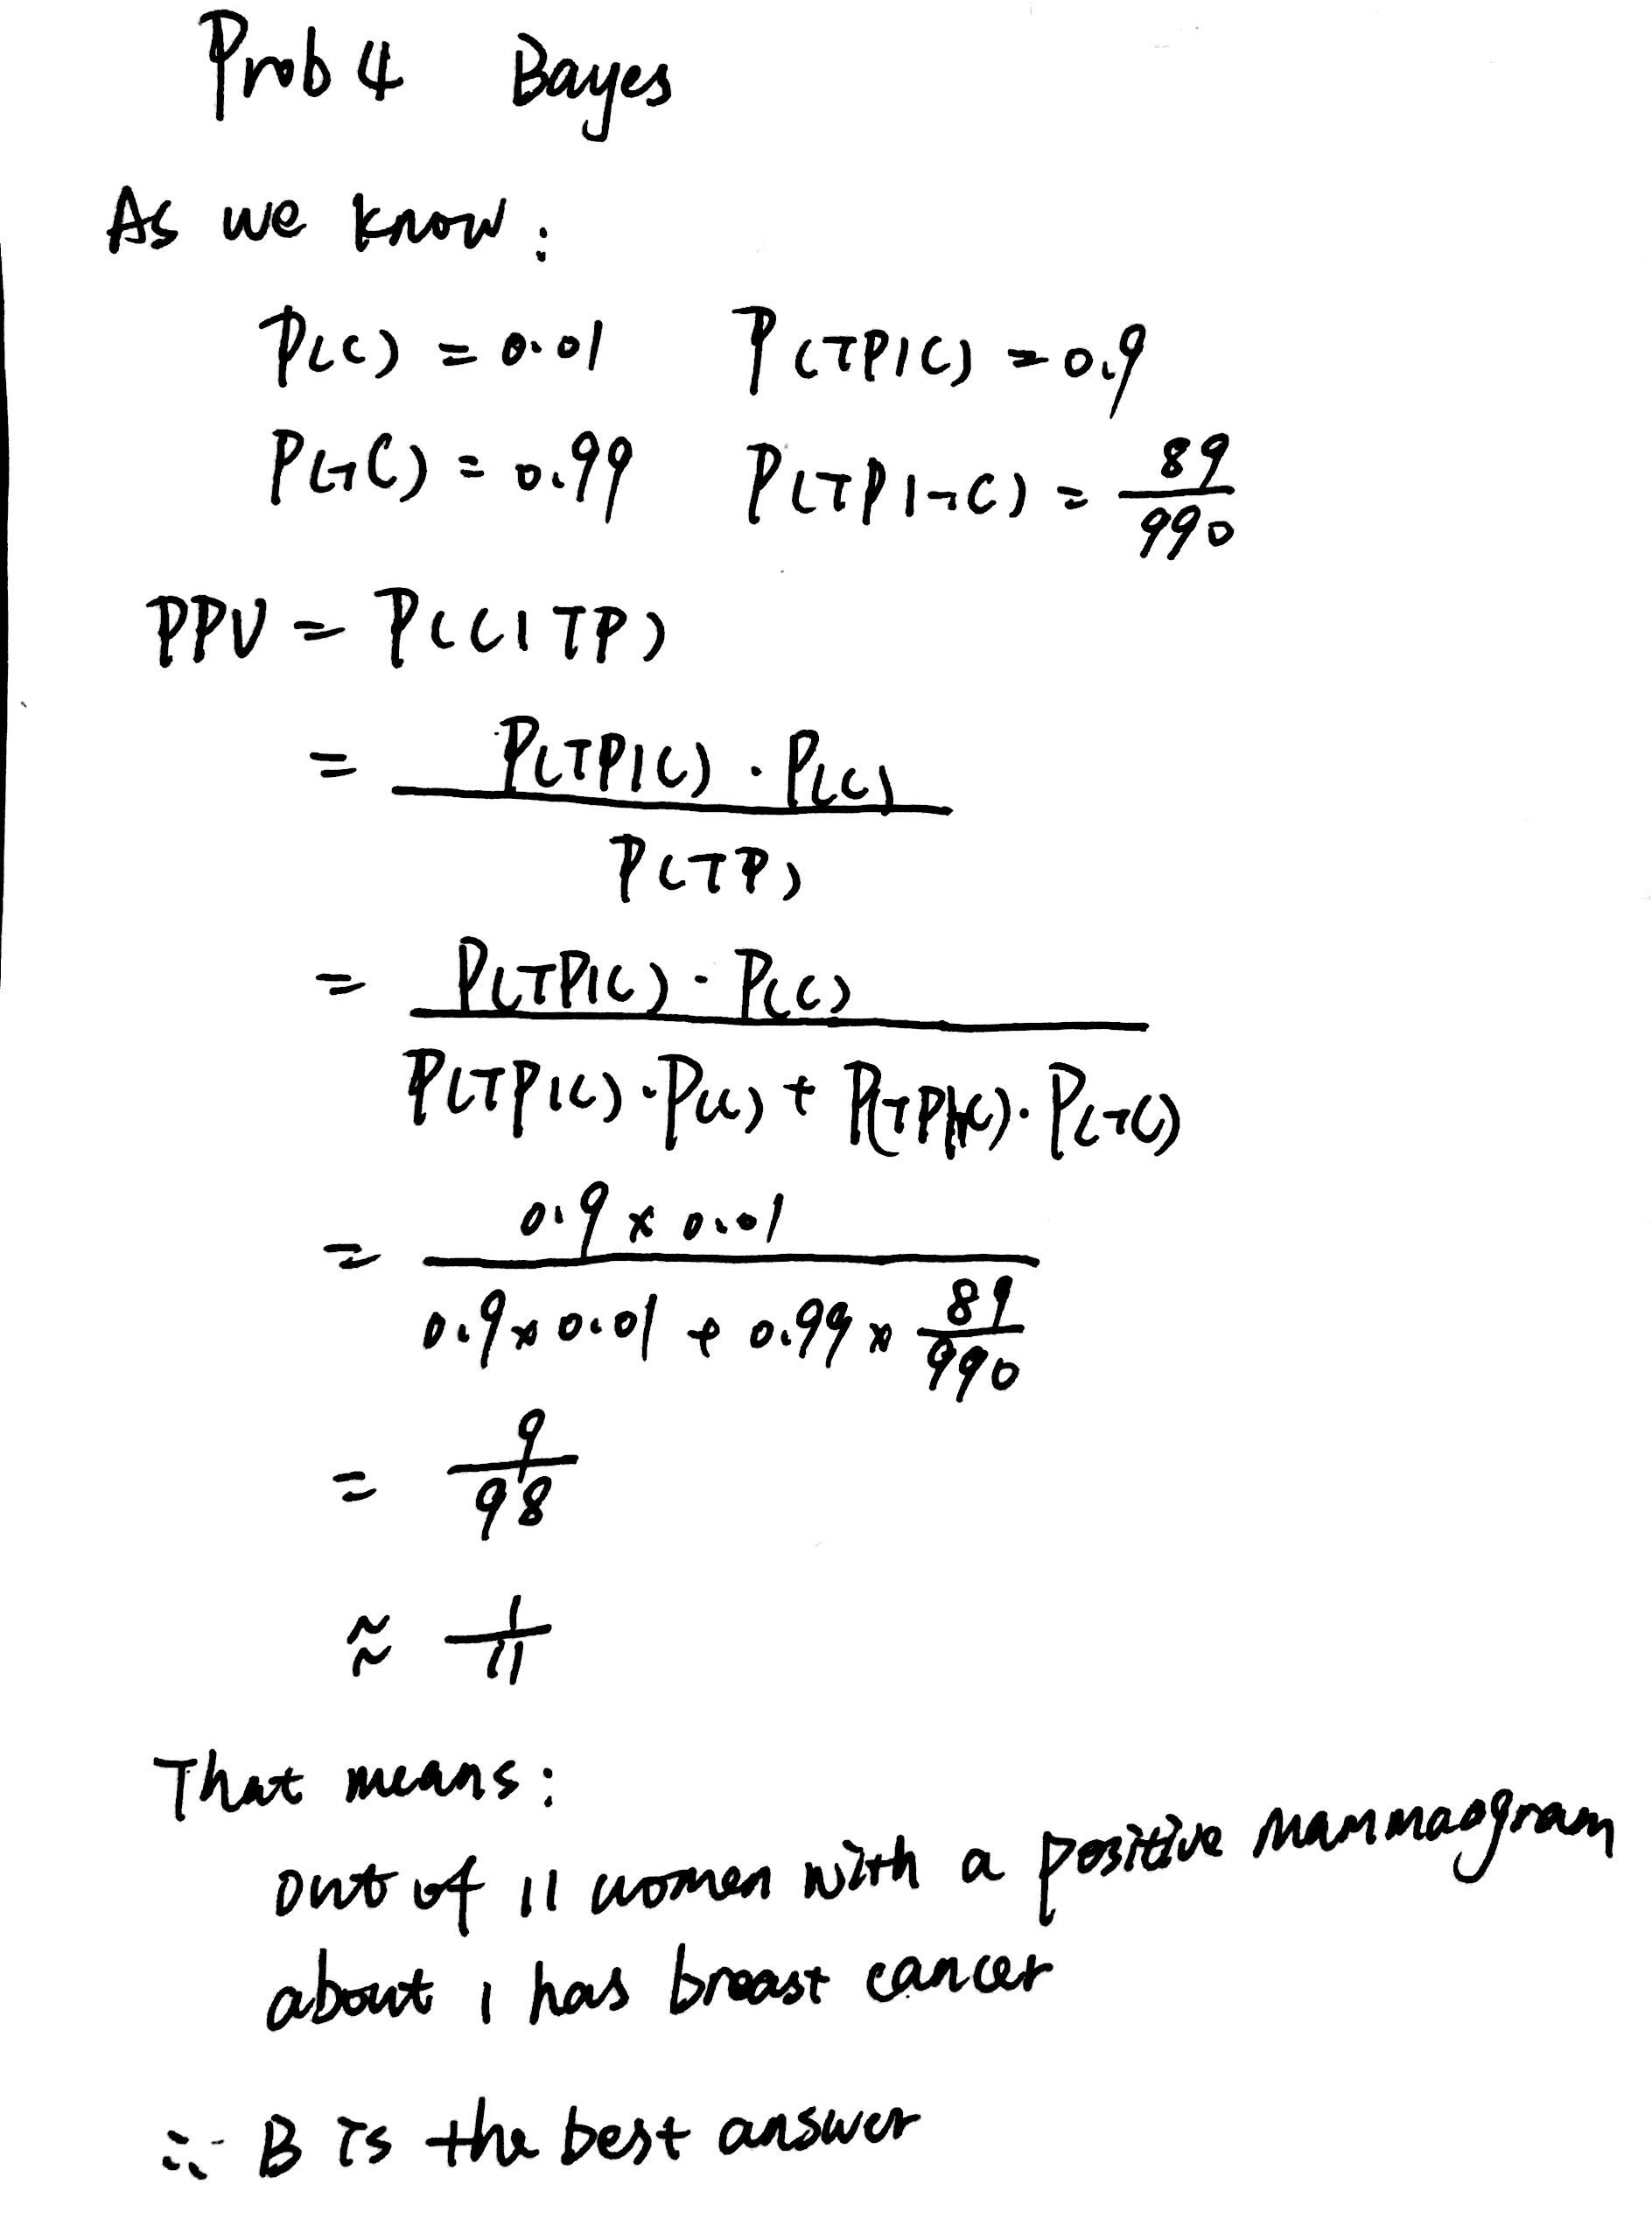

In [58]:
from IPython.display import Image
Image(filename="prob4.jpg",width="60%")

Answer:(2)